In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('3.01.+Country+clusters.csv')
data['Language'] = data['Language'].map({'English':0,'French':1,'German':2}) 
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


In [3]:
lang_inputs = data.iloc[:,1:3]
lang_inputs

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


In [4]:
kmeans = KMeans(2)
kmeans.fit(lang_inputs)

KMeans(n_clusters=2)

In [5]:
predictions = kmeans.fit_predict(lang_inputs)
predictions

array([1, 1, 1, 1, 1, 0])

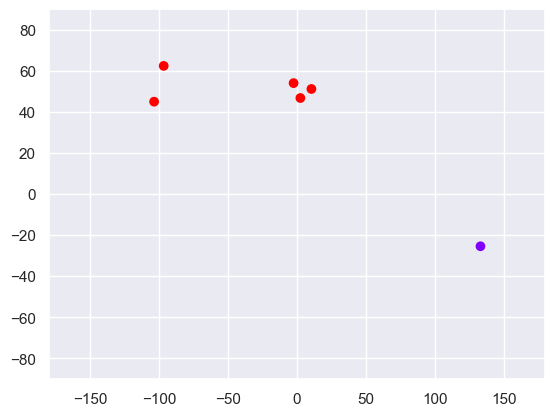

In [6]:
plt.scatter(data['Longitude'],data['Latitude'],c=predictions,cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [11]:
# With-in cluster sum of squares (should be minimized)
wcss = []

# because max clusters could be 6 
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(lang_inputs)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[42601.91356666667,
 13205.758119999999,
 288.10523333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

Text(0, 0.5, 'Within-cluster Sum of Squares')

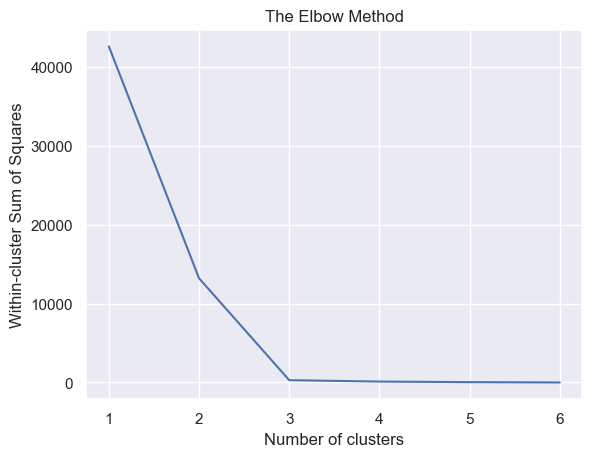

In [21]:
# Create a variable containing the numbers from 1 to 6, so we can use it as X axis of the future plot
number_clusters = range(1,7)
# Plot the number of clusters vs WCSS
plt.plot(number_clusters,wcss)
# Name your graph
plt.title('The Elbow Method')
# Name the x-axis
plt.xlabel('Number of clusters')
# Name the y-axis
plt.ylabel('Within-cluster Sum of Squares')